מעבדה 5 , בנוסף הגשנו את המעבדה כהגשה מול אורצוק וצירפנו בקובץ את ההגשה של המצגת.

דייויד פיץ , עמית חן , טל כהן


Imports and constants for the following code


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pickle

COMP_NUM = 29
NUM_OF_PARTIES = 29
NUM_OF_BEST_PARTIES = 8
BIG_PARTY_ACRONYMS_rev = [name for name in list(["טב", "ל", "מחל", "שס", "ג", "פה", "אמת", "ודעם"])]
FULL_PARTY_NAMES = {"הליכוד": "מחל", "כחול לבן": "פה", "הרשימה המשותפת": "ודעם", "שס": "שס", "יהדות התורה": "ג",
                      "העבודה-גשר-מרץ": "אמת", "ישראל ביתנו": "ל", "ימינה": "טב", "עוצמה יהודית": "נץ",
                      "עוצמה ליברלית": "ז",
                      "קול הנשים": "נ", "הפיראטים": "ףז", "משפט צדק": "קץ", "ישראליסט": "ק", "אני ואתה": "כן",
                      "איחוד הברית": "ינ",
                      "סדר חדש": "קך", "הכח להשפיע": "נז", "מתקדמת": "נק", "דעם": "ץ", "הלב היהודי": "כ", "שמע": "קי",
                      "הגוש התנכי": "יק", "קמה": "ני", "אדום לבן": "יז", "החזון": "י", "מנהיגות חברתית": "יר",
                      "כבוד האדם": "יף",
                      "פעולה לישראל": "זך", "צומת": "זץ"}

new_parties = {}
for key in FULL_PARTY_NAMES.keys():
    new_parties[FULL_PARTY_NAMES[key]] = key
FULL_PARTY_NAMES=new_parties
BIG_PARTY_ACRONYMS = [name[::-1] for name in list(["מחל","פה" ,"ודעם", "שס", "ג", "אמת", "ל","טב" ])]
BIG_PARTY_NAMES_FULL = [name[::-1] for name in list(["הליכוד","כחול לבן" ,"הרשימה המשותפת", "שס", "יהדות התורה", "העבודה-גשר-מרץ", "ישראל ביתנו","ימינה" ])]

# BIG_PARTY_NAMES = {"טב":"ימינה","מחל":"הליכוד","פה":"כחול לבן","אמת":"העבודה גשר מרץ",
#                    "שס":"שס","ג":"יהדות התורה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה","טב":"ימינה",""}
ALL_PARTY_ACRONYMS = [name[::-1] for name in list(['אמת', 'ג', 'ודעם', 'ז', 'זך', 'טב', 'י', 'יז', 'ינ', 'יף',
                   'יק', 'יר', 'כ', 'כן', 'ל', 'מחל', 'נ', 'נז', 'ני', 'נץ', 'נק',
                   'פה', 'ףז', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'שס'])]
ALL_PARTY_ACRONYMS_ORIGINAL = ['אמת', 'ג', 'ודעם', 'ז', 'זך', 'טב', 'י', 'יז', 'ינ', 'יף',
                   'יק', 'יר', 'כ', 'כן', 'ל', 'מחל', 'נ', 'נז', 'ני', 'נץ', 'נק',
                   'פה', 'ףז', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'שס']

ALL_PARTY_ACRONYMS_no_vadam = [name[::-1] for name in list(['אמת', 'ג',  'ז', 'זך', 'טב', 'י', 'יז', 'ינ', 'יף',
                   'יק', 'יר', 'כ', 'כן', 'ל', 'מחל', 'נ', 'נז', 'ני', 'נץ', 'נק',
                   'פה', 'ףז', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'שס'])]

ALL_PARTY_ACRONYMS_NO_BIG_3 = [name[::-1] for name in list(['אמת', 'ג',  'ז', 'זך', 'טב', 'י', 'יז', 'ינ', 'יף',
                   'יק', 'יר', 'כ', 'כן', 'ל', 'נ', 'נז', 'ני', 'נץ', 'נק',
                   'ףז', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'שס'])]

Clearing the data and preparing, dropping the needed columns.

In [91]:

def clear_data():
    """
    clear the un necessary data from file
    :return:
    """
    # data process
    df_2020_raw = pd.read_csv("/content/vote_per_kalpi_2020.csv",
                              encoding='iso-8859-8',
                              index_col='שם ישוב' )
    # clear the data
    df_2020_raw = df_2020_raw.drop('מעטפות חיצוניות', axis=0)
    df_2020 = df_2020_raw.drop('סמל ועדה', axis=1)  # new column added in Sep 2019
    df_2020 = df_2020[df_2020.columns[9:]]
    df_2020_raw = df_2020_raw.drop("זץ", axis=1)
    df_2020 = df_2020.drop("זץ", axis=1)
    return df_2020_raw, df_2020



Doing the pca algorithem with a defualt PCA componenets of 2 , using the fit_Transform which returned the fitted data over DF.

In [90]:
def do_PCA(df, order=2):

    pca = PCA(n_components=order)  # define PCA object
    X_pca = pca.fit_transform(df)  # fit model. Compute principal components
    return X_pca, pca.components_


Scatter the plot with annotate for names of the parties , 

In [89]:

def scatter_plot(X, PARTY_ALL_NAMES2):
    fig, ax = plt.subplots()
    X = np.array(X)
    ax.scatter(X[0, :], X[1, :])
    rev_names = [name[::-1] for name in list(PARTY_ALL_NAMES2)]

    for i, txt in enumerate(rev_names):
        ax.annotate(txt, X[:, i])

    plt.figure(figsize=(10, 10))

    plt.show()

print pc_ratio barlots , compare the pc ratios of the explained variance by each pricinal component to see how much each one influences. (Was not needed for the excerises but was done as an extra beacuse we presented it infront of Or Zuk)

In [88]:

def pc_ratio_barplot(df, comp_num,title="",name="a",plotline=False):
    pca = PCA(n_components=comp_num)
    pca.fit_transform(df)
    plt.figure(figsize=(16.3,10))
    explained_varaince = pca.explained_variance_ratio_
    df_explained = pd.DataFrame({'Princaple componenets': np.arange(comp_num)+1, 'explained variance ratio':explained_varaince})
    sns.barplot(x='Princaple componenets', y='explained variance ratio',data= df_explained)
    if plotline:
        sns.lineplot(x=np.arange(comp_num)+1,y='explained variance ratio',data=df_explained)

    plt.title(title)
    plt.savefig(name+".png")

    plt.show()


Graphing using seaborn ,  once for the parties and once for ballots. Could also be done in 3 dimensions.

In [86]:


def Seaborn_scatter_parties(X_DF,name,title,Dim3=False,num_colors=29,fig_size=(25,16)):
    plt.figure(figsize=fig_size)
    if Dim3:
        palette = sns.color_palette("vlag", as_cmap=True)
        p1 = sns.scatterplot(data=X_DF, x="PC1", y="PC2", marker="o", hue='PC3',size='PC3',sizes=(300,1000),alpha=0.87,palette=palette)
    else:
        palette = sns.color_palette("hls",num_colors)
        p1 = sns.scatterplot(data=X_DF, x="PC1", y="PC2", marker="o",size="Parties_names",hue="Parties_names",sizes=(300,300),palette=palette)
    for line in range(0, X_DF.shape[0]):
        p1.text(X_DF.PC1[line], X_DF.PC2[line], X_DF.Parties_names[line], horizontalalignment='left', size='medium',
                color='black',
                weight='semibold')
    plt.title(title)
    plt.savefig(name)
    plt.show()

def Seaborn_scatter_ballots(X_DF,name,title):
    plt.figure(figsize=(16.3, 13))
    eco_lev_extreme="קיצניות אשכול כלכלי"
    eco_lev_extreme=eco_lev_extreme[::-1]
    eskhol = "אשכול חברתי כלכלי"
    eskhol=eskhol[::-1]
    X_DF[eco_lev_extreme] = abs(X_DF[eskhol]-5.5)+0.5
    palette = sns.color_palette("coolwarm", as_cmap=True)
    p1 = sns.scatterplot(data=X_DF, x="PC1", y="PC2", marker="o", hue=eskhol,size=eco_lev_extreme,
                         sizes=[50,100,150,250,800],alpha=0.87,palette=palette,legend='full')
    plt.title(title)
    p1.set_xlabel("PC1")
    p1.set_ylabel("PC2")
    plt.savefig(name)
    plt.show()


Init and normazlie the data frames , the normalization is done by columns beacuse we want to noramzlie each  party , was done by broadcasing with euclidean norm. , also [:,np.newaxis] we used to match the dimensions for the correct broadcasting.

In [87]:
df_raw, df = clear_data()
df=df.rename(columns=new_parties)
df_T = df.T
df_normalized_T = df_T / np.linalg.norm(df_T, axis=1, ord=2)[:, np.newaxis]

האם הקרבה מפתיעה\ לא מפתיעה?:
הקרבה לא מפתיעה אם לוקחים בחשבון את העובדה שכמות הקלות הינה הפקטור העיקרי בגודל הנקודה , בנוסף לכך השונות המסוברות הינה אחראית לכיוון. לכן וועדם שגודלה כמעט באותה מידה כמו הליכוד וכחול לבן הינם נמצאת בציר הנגדי עקב כך שהדפוס הצבעה אלייה  שונות משמעותית מן הליכוד וכחול לבן ,  ומפלגות בעלי כמות הצבעות קטנה יותר הינם נמצאות תחת אותו הקלאסטר ככול שהכמות יורדת , עקב כך שערכה מושפע מהגודל , ולכן גשר מרץ ושס לדוגמא דומים אפילו אם המפלגות הינם שונות מאוד נטו כי כמות הקולות אליהם הייתה באותו הסדר גודל ביחס לשונות המוסברות.

האם תוכלו לתת משמעות לצירים?:
ציר איקס :
אני מניחים שציר האיקס זה ריכזויות , כלומר , עבור קלפי שאכן הצביע למפלגה , האם ההצבעות היו ברובם המוחלט עבור המפלגה או שההצבעות היו יותר מפולגות בין הקלפיות , כאשר ערך גבוה הינו פחות קיצוני וערך נמוך הינו מקרה יותר קיצוני , לדוגמא ועדם הינה השלילית ביותר עקב כך שאצלה בדר"כ ההצבעות הינם בסגנון "הכול או כלום" ולעומת זאת הליכוד וכחול לבן , שהצבעות בכול קלפי הינם הרבה פחות אחידות קיבלו ערכים גדולים מאוד בציר האיקס.

ציר הואי:
ציר הואי מבטא את כמות ההצבעות בין בני מיעוטים בקרב המצביעים , לכן ועדם הינם הכי גבוהים וניתן לראות כי כחול לבן הינם מקום שני עקב התמיכה הרבה שהינם מקבלים ממפלגות ערביות.

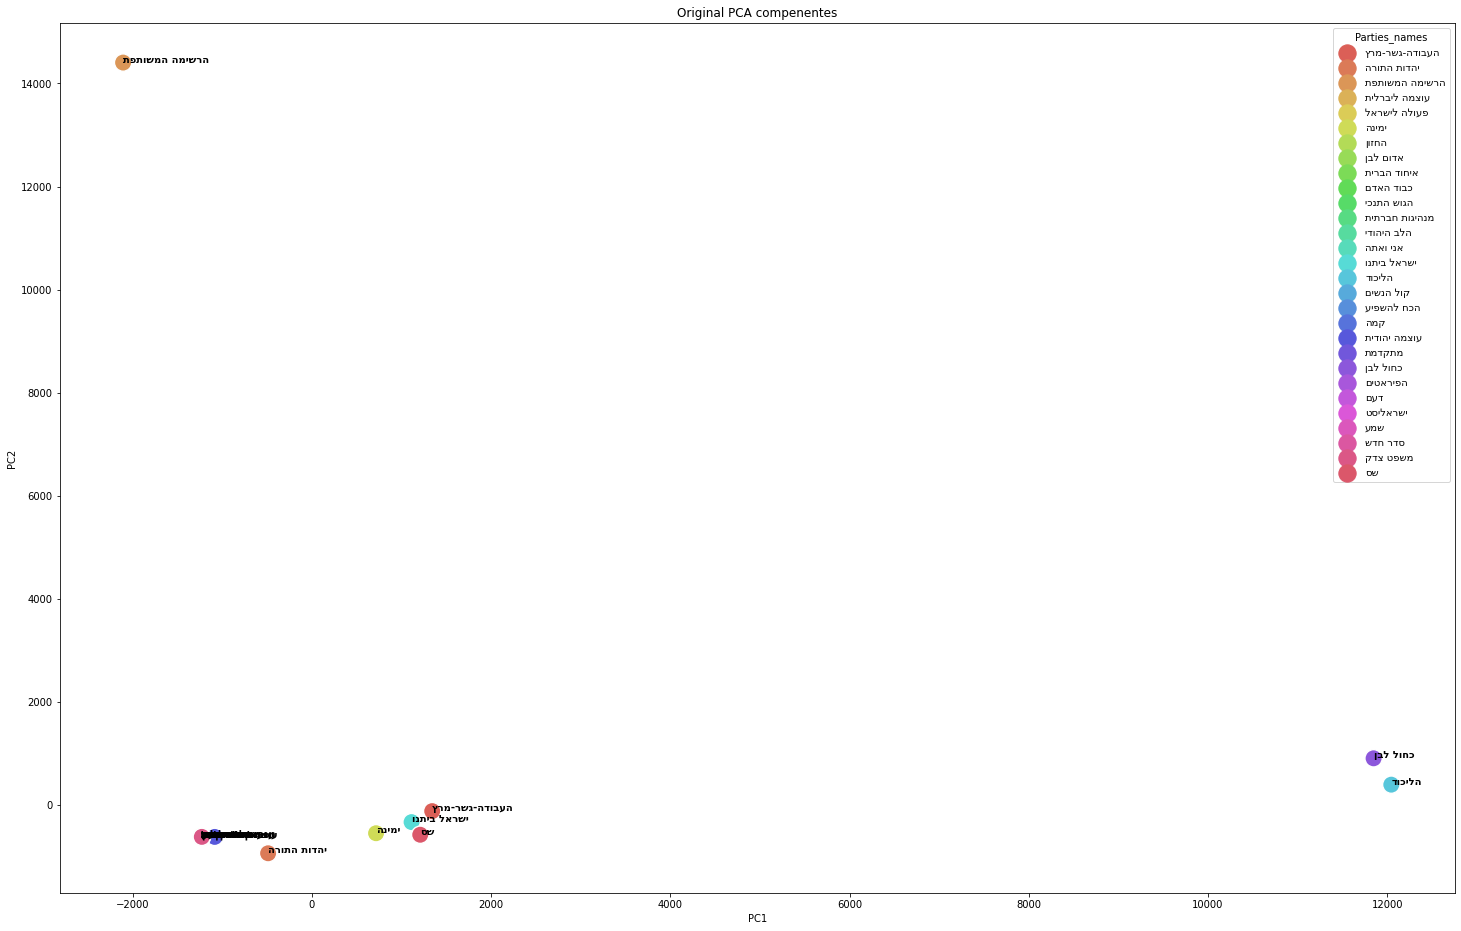

In [85]:
def scatter_pca(df_T,PARTY_NAMES=new_parties,fig_name="a",title="",Dim3=False,comps=2,num_colors=29):

    X, c = do_PCA(df_T,comps)
    X_T = X.T
    all_party_ac = [name[::-1] for name in df_T.index]

    X_DF = pd.DataFrame({'PC1': X_T[0, :], 'PC2': X_T[1, :],
                         'Parties_names':all_party_ac})
    Seaborn_scatter_parties(X_DF,name= fig_name+".png",title=title,Dim3=Dim3,num_colors=num_colors)

scatter_pca(df_T,title="Original PCA compenentes",fig_name="pca_classic")



סקאטר מנורמל , כלומר כאשר אין חשיבות לגודל המפלגה ורק לדפוס ההצבעה שלה.

קרבת מפלגות :
כן , כמובן שהשתנה עקב כך שגודל כבר אינו פקטור וההתפלגות הינה הגורם העיקרי. לדוגמא כחול לבן ועבודה-גשר-מרץ בגרף הקודם היו רחוקות כמעט יותר מ10 אלף ,וכעת הינו במרחק קצר הרבה יותר , וזה מעיד על  התפלגות דומה ביניהם

ציר איקס :
הצפיפות נשארה כמו קודם , ניתן לראות זאת בכך שאיחוד הברית והרישמה המשתופת שני מפלגות הצבעות ששניהם "הכל או כלום" ולכן שמאל באופן קיצוני.

ציר ואי  כן השתנה :
מבטא יהודיות , ככל שציר הואי גבוה יותר כך המפלגה תהיה יותר יהודית , וככל שיותר נמוכה כך תהיה יותר כך המפלגה יותר חילונית , לכן יהדות התורה ראשונה ואז שס , עוצמה יהודית ימינה , והליכוד וכחול לבן הינם בצד הנגדי.



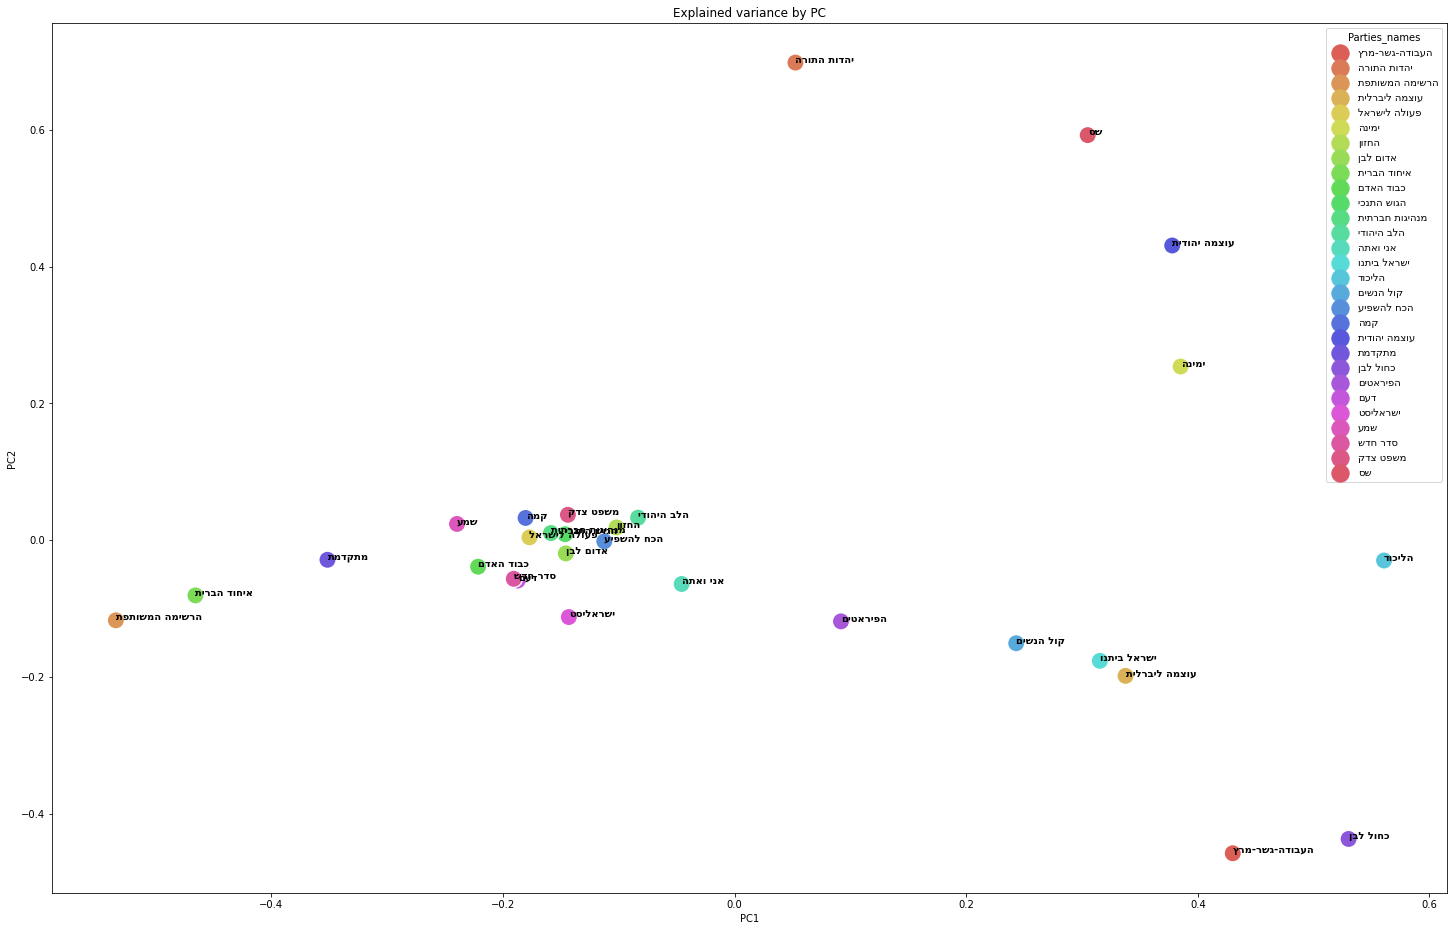

שם ישוב,אבו גווייעד שבט,אבו גווייעד שבט,אבו גווייעד שבט,אבו גוש,אבו גוש,אבו גוש,אבו גוש,אבו גוש,אבו גוש,אבו גוש,אבו גוש,אבו סנאן,אבו סנאן,אבו סנאן,אבו סנאן,אבו סנאן,אבו סנאן,אבו סנאן,אבו סנאן,אבו סנאן,אבו סנאן,אבו סנאן,אבו סנאן,אבו סנאן,אבו עבדון שבט,אבו קורינאת שבט,אבו קורינאת שבט,אבו קורינאת שבט,אבו קורינאת שבט,אבו קרינאת יישוב,אבו רובייעה שבט,אבו רובייעה שבט,אבו רובייעה שבט,אבו רובייעה שבט,אבו רובייעה שבט,אבו רובייעה שבט,אבו רוקייק שבט,אבו רוקייק שבט,אבו רוקייק שבט,אבו רוקייק שבט,...,תל מונד,תל מונד,תל עדשים,תל עדשים,תל קציר,תל שבע,תל שבע,תל שבע,תל שבע,תל שבע,תל שבע,תל שבע,תל שבע,תל שבע,תל שבע,תל שבע,תל שבע,תל שבע,תל תאומים,תלם,תלמי אליהו,תלמי אלעזר,תלמי בילו,תלמי יוסף,תלמי יחיאל,תלמי יפה,תלמים,תמרת,תמרת,תנובות,תעוז,תפרח,תפרח,תקומה,תקוע,תקוע,תקוע,תראבין אצאנע שבט,תראבין אצאנעישוב,תרום
העבודה-גשר-מרץ,0.000561,0.001682,0.001402,0.004205,0.001682,0.000841,0.004485,0.003084,0.003644,0.001682,0.001402,0.003644,0.000561,0.000561,0.000561,0.004485,0.001121,0.001121,0.002243,0.002523,0.003084,0.001682,0.002523,0.001682,0.000000,0.001121,0.000000,0.001121,0.000280,0.002523,0.000280,0.000561,0.000561,0.000561,0.000000,0.000280,0.000000,0.000000,0.000280,0.000561,...,0.009251,0.006728,0.010092,0.005887,0.012615,0.000841,0.001402,0.000841,0.000000,0.001121,0.000561,0.000561,0.000000,0.000561,0.000280,0.000000,0.000280,0.000000,0.000280,0.000000,0.001121,0.018221,0.004205,0.007008,0.006167,0.009811,0.000561,0.027191,0.019062,0.007849,0.008970,0.000280,0.000000,0.001402,0.003084,0.002803,0.001962,0.000000,0.000000,0.002523
יהדות התורה,0.000000,0.000000,0.000000,0.000122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000367,0.000244,0.000000,0.000000,0.000000,0.000000,0.000244,0.000122,0.000000,0.000000,0.000000,0.000122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000122,0.000000,0.000122,0.000000,0.000000,...,0.000000,0.000000,0.000367,0.000611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000122,0.001344,0.000489,0.000244,0.000367,0.000000,0.000000,0.000000,0.003544,0.000000,0.000367,0.000367,0.000244,0.038374,0.042407,0.000611,0.001344,0.001711,0.000978,0.000000,0.000000,0.000855
הרשימה המשותפת,0.007425,0.015579,0.013723,0.015181,0.021877,0.017104,0.024131,0.013325,0.020551,0.017237,0.013590,0.031291,0.030230,0.020352,0.023535,0.027380,0.024198,0.021811,0.026717,0.023733,0.023999,0.012927,0.011071,0.018297,0.002652,0.023336,0.020220,0.019955,0.020220,0.017502,0.016110,0.014519,0.017502,0.017303,0.013590,0.015844,0.012264,0.021877,0.021347,0.023667,...,0.000066,0.000066,0.000199,0.000133,0.000000,0.021612,0.028971,0.027512,0.032352,0.035202,0.034208,0.026783,0.027777,0.023733,0.024264,0.020286,0.033877,0.022341,0.000000,0.000000,0.000000,0.000265,0.000000,0.000000,0.000000,0.000000,0.000133,0.000331,0.000133,0.000000,0.000066,0.000000,0.000000,0.000000,0.000066,0.000133,0.000000,0.002851,0.010607,0.000000
עוצמה ליברלית,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028273,0.000000,0.000000,0.014136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.014136,0.014136,0.014136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014136,0.014136,0.000000,0.000000,0.000000,0.014136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042409,0.042409,0.014136,0.000000,0.000000,0.000000
פעולה לישראל,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [84]:

def normalize_scatter(df_T,PARTY_NAMES=ALL_PARTY_ACRONYMS,title="",Dim3=False,comps=2,fig_name="a"):
    df_normalized_T = df_T / np.linalg.norm(df_T, axis=1, ord=2)[:, np.newaxis]
    X_normalized, c_normalized = do_PCA(df_normalized_T, order=3)
    X_normalized_T = X_normalized.T
    all_party_ac = [name[::-1] for name in df_T.index]

    X_normalized_DF = pd.DataFrame({'PC1': X_normalized_T[0, :], 'PC2': X_normalized_T[1, :], 'PC3': X_normalized_T[2, :]
                                       , 'Parties_names':all_party_ac})
    Seaborn_scatter_parties(X_normalized_DF,title=title,Dim3=Dim3,name=fig_name)
    return df_normalized_T

df_normalized_T = df_T / np.linalg.norm(df_T, axis=1, ord=2)[:, np.newaxis]
normalize_scatter(df_normalized_T,title="Explained variance by PC",Dim3=False,comps=3,fig_name="normazlied_pca")


ימין קיצוני הינם כפרים וערים ערבים , אמצע למטה יותר בני ברק אלעד וערים דתיות נוספות.
כל הקשת מצד שמאל דוגמא קיימות בה המון קלפיות מפתח תקווה וערים ראשיות נוספות כגון , תל אביב , חיפה הינם בעיקר על הקשת השמאלית.


ציר איקס :
מצב סוציו אקונומי בקירוב גס עקב כך שהמצב סוציו אקונומי ניתן פר עיר ולא פר קלפי.
ימינה יותר נוטים להיות בעלי מצב סוציו אוקונמי נמוך ושמאלה יותר בעל גבוהה.

ציר ואי :
ימין מול שמאל  , למעלה יותר נוטים לכייון אידואלגיה שמאלנית ולמטה יותר לכיוון ימינית

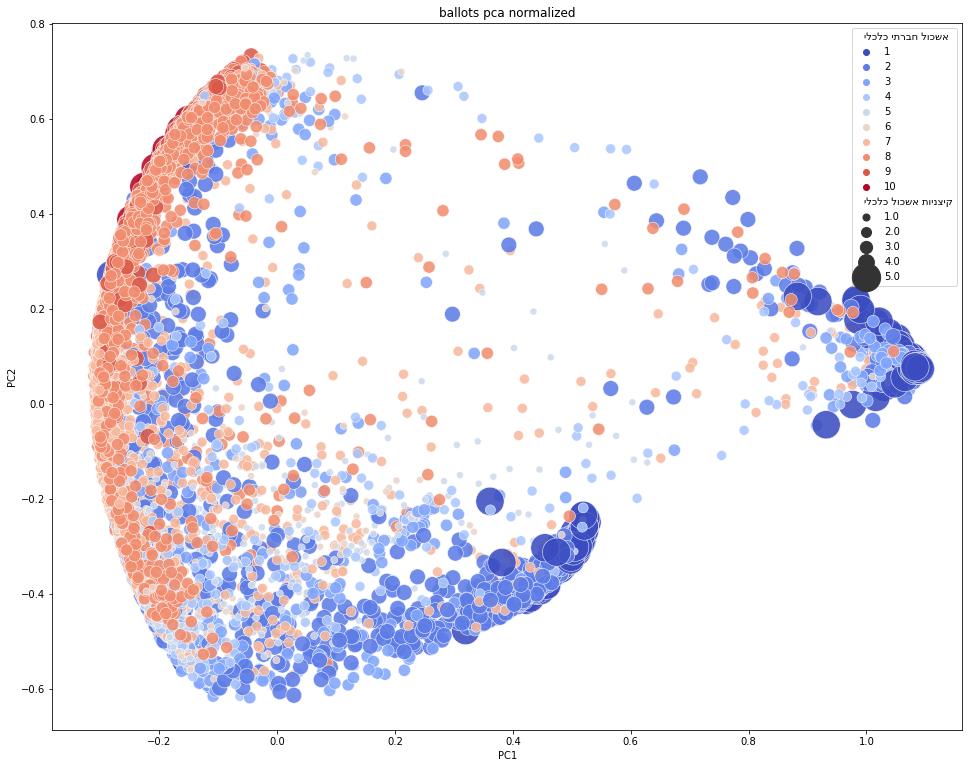

In [83]:
def Q2_A(df_raw):
    eshkol_hevrati_calcali = pd.read_csv("eshkol_hevrati_calcali.csv", encoding='iso-8859-8')
    eshkol_hevrati_calcali = eshkol_hevrati_calcali.drop('name', axis=1)
    merged = df_raw.merge(eshkol_hevrati_calcali, how='inner', left_on='סמל ישוב', right_on='set_code')
    merged_parties = merged[ALL_PARTY_ACRONYMS_ORIGINAL]
    merged_parties = merged_parties.T
    merged_parties_normalized = merged_parties / np.linalg.norm(merged_parties, axis=0)

    merged[ALL_PARTY_ACRONYMS_ORIGINAL] = merged_parties_normalized.T
    X, comp = do_PCA(merged[ALL_PARTY_ACRONYMS_ORIGINAL], 2)
    X_T = X.T
    eskhol="אשכול חברתי כלכלי"
    eco_pca = pd.DataFrame({'PC1': X_T[0, :], 'PC2': X_T[1, :],  eskhol[::-1]: merged['eco_level']})

    Seaborn_scatter_ballots(eco_pca, 'q2_a.png', 'ballots pca normalized')
    return eco_pca, merged , comp
  
   
eco_pca, merged,componenets = Q2_A(df_raw)
df_norm_kalpis = df_T/ np.linalg.norm(df_T, axis=0,ord=2) 


השוונו בין ג' לבין אמת

הצבעה למפלגת ג' מעידה על ריכוזיות האוכלוסיה באיזורים מסויים מבחינה גאוגרפית, 
ובכך שהאוכלוסייה 
דתית ולרוב מצביעה בהתאם להנחיות של גורמים רבניים בכירים. כמו כן האוכ' החרדתית 
מתבטאת ברובה כאוכלוסיה ממעמד סוציו אקונומי נמוך ולכן היא מרוכזת בצד ימין למטה.

לעומת זאת, מפלגת אמת מורכבת ממפלגות בעלות השתייכות לציבור חילוני. המצביעים אליה משוייכים לרוב לאוכלוסייה הבורגית או לתנועות הקיבוצים והמושבים. האוכלוסיות העיקריות (יהודים חילונים) אלו לרוב מגיעות ממעמד סוציו-אקונומי גבוה לכן היא "שמאלה-למעלה". למרות כל זאת, ניתן להעריך שקיימות אוכלוסיות ערביות שמצביעות לאמת, ככל הנראה על סמך מצע הבחירות שלהם והזדהותן האידאולוגית (בעיקר על סמך התמיכה מפלגת מרצ). 
אולם, ניתן להסיק שהריכוזיות שאפיינה את מפלגת ג' אינה מאפיינת באופן מובהק את מלגת אמת. מכיוון שפיזור הקולות למלגה רחב יותר, כלומר ניתן להסיק שקיימים הבדלים בולטים יותר באופיים של המצביעים, ועל כן באה לידי ביטוי הרב-גוניות של המלגה הזו.

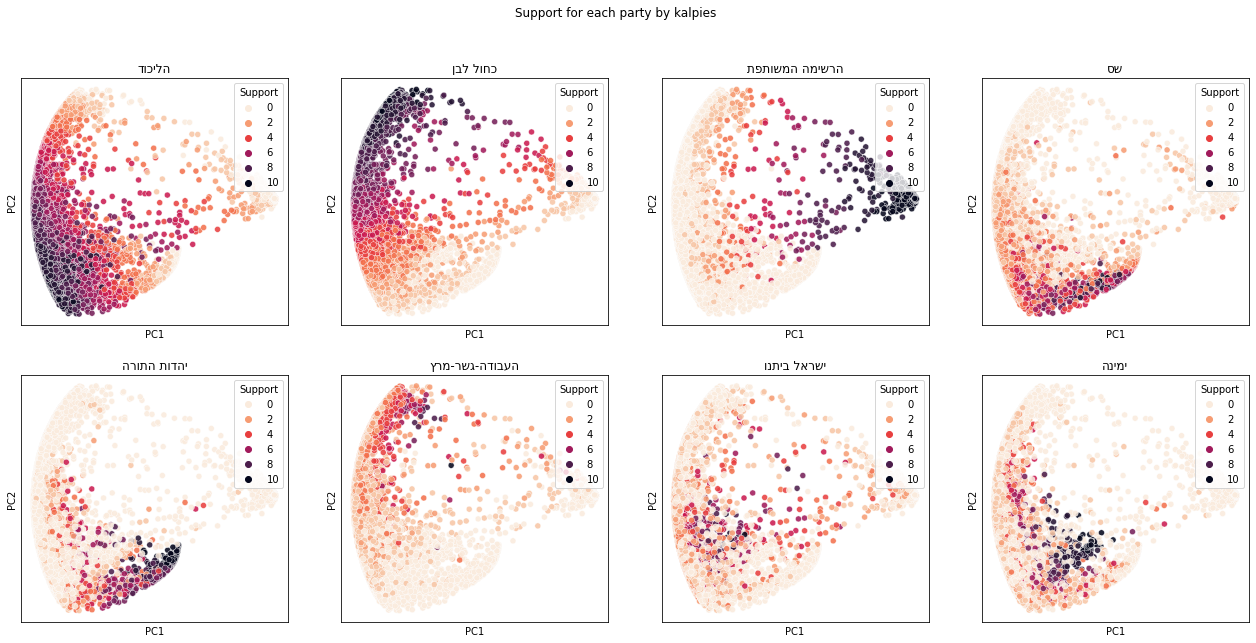

<Figure size 1173.6x936 with 0 Axes>

In [82]:

def Q2_B(eco_pca, merged):
    fig, ax = plt.subplots(2, 4,figsize=(22,10))
    k = 0
    # todo axes names
    plt.figure(figsize=(16.3, 13))
    eco_lev_extreme = "קיצניות אשכול כלכלי"
    eco_lev_extreme_r = eco_lev_extreme[::-1]
    eskhol = "אשכול חברתי כלכלי"
    eskhol = eskhol[::-1]
    city_name = "שמות ערים"
    city_name = city_name[::-1]
    for i in range(2):
        for j in range(4):
            eco_pca['Support'] = np.round(merged[[BIG_PARTY_ACRONYMS[k][::-1]]] * 10)
            palette = sns.color_palette("rocket_r", as_cmap=True)
            sns.scatterplot(data=eco_pca, x="PC1", y="PC2", marker="o", hue='Support',
                            alpha=0.87, palette=palette,legend=True,  ax=ax[i, j])
            ax[i, j].set_title(BIG_PARTY_NAMES_FULL[k])
            ax[i, j].set_yticks([])
            ax[i, j].set_xlabel("PC1")
            ax[i,j].set_ylabel("PC2")
            ax[i, j].set_xticks([])
            k += 1

    
    fig.suptitle("Support for each party by kalpies")
    plt.savefig("q2_b.png")
    plt.show()

Q2_B(eco_pca, merged)


מבדיקה שעשינו, כמות הקלפיות בערים הן: באום אל פאחם 55 קלפיות (אחת על השניה כי ממש דומות) לכן הגרף טיפה מתעתע בגלל הקירבה של הנקודות. 
בבני ברק – 175
בפתח תקווה - 308אפשר לדבר על המעמד הסוציו אקונומי של כל עיר – גודל הנקודות (גרף עם 3 מימדים). קל לראות כי פ''ת נמצאת ברמה סוציו אוקונמית גבוה יותר מאשר העיר החרדית והערבית. כמו כן היא הרבה יותר מגוונת מאשר השתיים האחרות
הסבר לפיזור של בני ברק ופ''ת לעומת אום אל פחם.
ציר איקס – כמו בשאלה הקודמת 
ציר וואי – כמו בשאלה הקודמת
הערה על חרדים בפ‘’ת – נבחין כי פתח תקווה, באופן לא מובן מאליו, קרובה לבני ברק, להבנתנו קיימת שכונה חרדית בפתח תקווה ואף ישיבות גדולות ומובילות ולכן יכול להיווצר קשר בין הערים השונות, ולכן באמת הגרף מבטא את הקירבה בין הערים. 

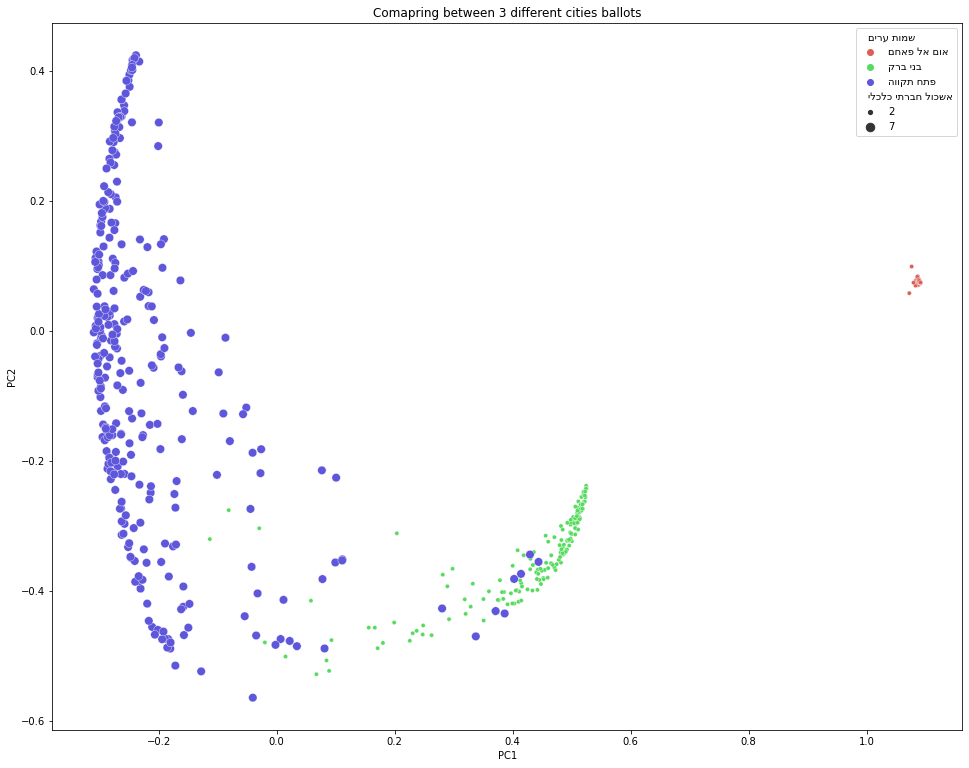

In [81]:
def Q2_C(eco_pca, merged):

    plt.figure(figsize=(16.3, 13))
    eco_lev_extreme="קיצניות אשכול כלכלי"
    eco_lev_extreme=eco_lev_extreme[::-1]
    eskhol = "אשכול חברתי כלכלי"
    eskhol=eskhol[::-1]
    city_name= "שמות ערים"
    city_name=city_name[::-1]
    eco_pca = pd.DataFrame({'x': eco_pca['PC1'], 'y': eco_pca['PC2'], eskhol: eco_pca[eskhol],
                            city_name: merged["set_code"], 'sizes': eco_pca[eco_lev_extreme]})
    df_comb = eco_pca.groupby([city_name])
    list_pds = []
    for j in df_comb:
        if j[0] in [7900, 6100, 2710]:
            list_pds.append(j[1])




    final = pd.concat(list_pds)
    final["PC1"]=final["x"]
    final["PC2"]=final["y"]

    palette = sns.color_palette("hls", 3)
    city1="פתח תקווה"
    city2="בני ברק"
    city3="אום אל פאחם"
    final=final.replace({7900:city1[::-1],6100 :city2[::-1], 2710 : city3[::-1]})
    sns.scatterplot(data=final, x="PC1", y="PC2", marker="o", hue=city_name, size=eskhol, legend="full",palette=palette)
    plt.savefig("q2_c.png")
    plt.title("Comapring between 3 different cities ballots")
    plt.show()


Q2_C(eco_pca,merged)

Plotting function of  the bar copmarsion of hte PC compennets only for the biggest 8 parties , using seaborn.

In [80]:
def plot_comp_big_eight(plot_bar_data):
    to_concat_df_big_eight = []
    for name in BIG_PARTY_NAMES_FULL:
        to_concat_df_big_eight.append(plot_bar_data[plot_bar_data["Party names"] == name])
    data_eight_party = pd.concat(to_concat_df_big_eight)
    plt.figure(figsize=(80, 10))
    g = sns.catplot(
        data=data_eight_party, kind="bar",
        x="Party names", y="Vector values", hue="Principal comps",
        ci="sd", palette="dark", height=6, legend=False)
    plt.legend(loc='upper right')
    g.set_xticklabels(rotation=45)
    plt.title("PC1 vs PC2 top 8 parties")
    g.despine(left=True)
    plt.savefig("q3_c_b.png")
    plt.show()


get full names  for the parties 

the second function plt comp of everything and compare them in teh same figure.

In [77]:

def get_full_names():
    full_names = []
    for i, name in enumerate(ALL_PARTY_ACRONYMS):
        full_names.append(FULL_PARTY_NAMES[name[::-1]][::-1])
    return full_names

def plot_comp_all(componenets,title=""):

    full_names = get_full_names()

    party_names_axis = np.hstack([full_names, full_names])
    pc_vec_values = np.hstack([componenets[0, :], componenets[1, :]])
    plot_bar_data = pd.DataFrame({"Party names": party_names_axis, "Vector values": pc_vec_values,
                                  "Principal comps": np.hstack([np.zeros(29) + 1, np.ones(29) + 1]).astype("int")})
    plt.figure(figsize=(20, 14))
    g = sns.catplot(
        data=plot_bar_data, kind="bar",
        x="Party names", y="Vector values", hue="Principal comps",
        ci="sd", palette="dark", height=6, legend=False)
    plt.legend(loc='upper right')
    g.set_xticklabels(rotation=83)
    g.despine(left=True)
    plt.title(title)
    plt.savefig("q3_c_a.png")
    plt.show()
    return plot_bar_data

עבור הקומפננטה הראשונה הליכוד והרשימה המשותפת הינם הדוננטים ביותר אך בכיוונים נגדיים , שזה עושה שכל עם המציאות.
כי ציר איקס הינו צפיפיות כפי שהגדרתי למעלה ולכן כחול לבן והליכוד הינו בעלי ערכים נגדים מהרשימה המשותפת.

עבור הקומפננטה השנייה כחול לבן הינה הדומננטית ביותר באופן חד משמעי , והליכוד הינה הקרובה יותר אך מכיוון הנגדי , שאכן גם הגיוני עם המציאות עקב שציר ואי הינו ימין מול שמאל.




<Figure size 1440x1008 with 0 Axes>

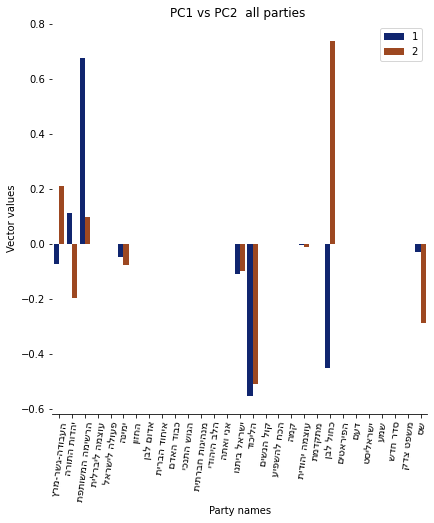

<Figure size 5760x720 with 0 Axes>

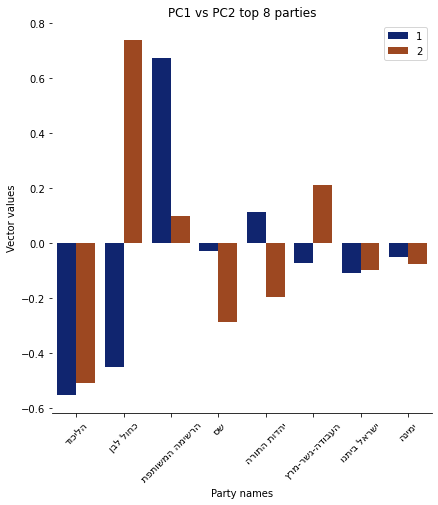

,Party names,Vector values,Principal comps
0,ץרמ-רשג-הדובעה,-0.073839,1
1,הרותה תודהי,0.113449,1
2,תפתושמה המישרה,0.675527,1
3,תילרביל המצוע,-0.001285,1
4,לארשיל הלועפ,-0.000008,1
5,הנימי,-0.049259,1
6,ןוזחה,-0.000079,1
7,ןבל םודא,-0.000025,1
8,תירבה דוחיא,0.000654,1
9,םדאה דובכ,0.000023,1


In [78]:



def Q3_A_v1(componenets):
    plot_bar_data = plot_comp_all(componenets,title="PC1 vs PC2  all parties ")
    plot_comp_big_eight(plot_bar_data)
    return plot_bar_data

Q3_A_v1(componenets)

עשינו פיט לדטא ולקחנו את השונות המסוברות מן המודל פיסיאי המאומן על הדטא , ציירנו גרף איתו .

ניתן לראות כי השונות המסוברות החל מן הקומפננטה התשיעית הינה שווה לאפס ולכן הדטא חי במימד 8 אחרי הפיסיאי ונמליץ להוריד למימד הזה שיהיו הנקודה האידאילית בטרייד אוף בין כמות השונות המוסברת למימד  המינימילי.

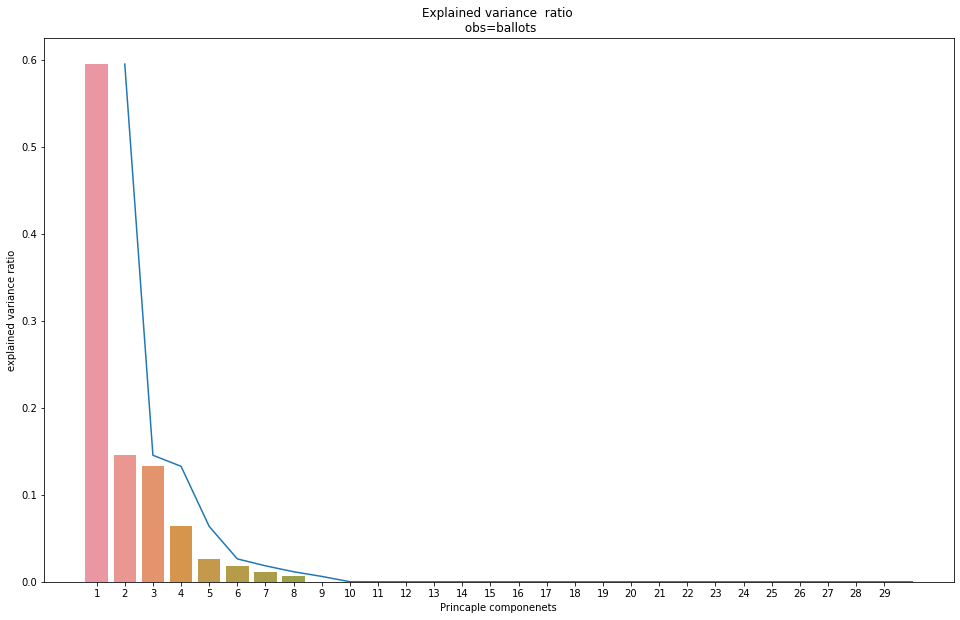

In [79]:
def pc_ratio_barplot(df, comp_num,title="",name="a",plotline=False):
    pca = PCA(n_components=comp_num)
    pca.fit_transform(df)
    plt.figure(figsize=(16.3,10))
    explained_varaince = pca.explained_variance_ratio_
    df_explained = pd.DataFrame({'Princaple componenets': np.arange(comp_num)+1, 'explained variance ratio':explained_varaince})
    sns.barplot(x='Princaple componenets', y='explained variance ratio',data= df_explained)
    if plotline:
        sns.lineplot(x=np.arange(comp_num)+1,y='explained variance ratio',data=df_explained)

    plt.title(title)
    plt.savefig(name+".png")

    plt.show()
    
pc_ratio_barplot(df_norm_kalpis,29, title="Explained variance  ratio \n obs=ballots",plotline=True)
